# Import required libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the dataset

In [2]:
data = pd.read_csv('Data.csv')
data.head(10)
# Data is taken from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant?ref=datanews.io

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


In [3]:
print(data.shape)

(9568, 5)


In [4]:
# Checking if the data has null values
data.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

# Separating dependent and independent data

In [5]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
y = y.reshape(len(y),1)

In [6]:
X

array([[  14.96,   41.76, 1024.07,   73.17],
       [  25.18,   62.96, 1020.04,   59.08],
       [   5.11,   39.4 , 1012.16,   92.14],
       ...,
       [  31.32,   74.33, 1012.92,   36.48],
       [  24.48,   69.45, 1013.86,   62.39],
       [  21.6 ,   62.52, 1017.23,   67.87]])

In [7]:
y

array([[463.26],
       [444.37],
       [488.56],
       ...,
       [429.57],
       [435.74],
       [453.28]])

# Splitting the dataset into the Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
print(X_train.shape, "\n", y_train.shape)

(7654, 4) 
 (7654, 1)


## (1) Multiple Linear Regression Model

In [10]:
from sklearn.linear_model import LinearRegression
MLregressor = LinearRegression()
MLregressor.fit(X_train, y_train)

LinearRegression()

## (2) Polynomial Regression Model

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
Polyregressor = LinearRegression()
Polyregressor.fit(X_poly, y_train)

LinearRegression()

## (3) Support Vector Regressor Model

### For this model we should do feature scaling first?

In [12]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
SVR_X_train = sc_X.fit_transform(X_train)
SVR_y_train = sc_y.fit_transform(y_train)

In [13]:
print(SVR_y_train.ravel().shape, '\n', SVR_X_train.shape)

(7654,) 
 (7654, 4)


In [14]:
from sklearn.svm import SVR
SVRregressor = SVR(kernel = 'rbf')
SVRregressor.fit(SVR_X_train, SVR_y_train.ravel())

SVR()

## (4) Decision Tree Regression Model

In [15]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor(random_state=0)
DTregressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

## (5) Random Forest Regression Model

In [16]:
from sklearn.ensemble import RandomForestRegressor
RFregressor = RandomForestRegressor(n_estimators=10, random_state=0)
RFregressor.fit(X_train, y_train.ravel())

RandomForestRegressor(n_estimators=10, random_state=0)

## (6) XGBoost Regressor Model

In [17]:
from xgboost import XGBRegressor
XGBregressor = XGBRegressor()
XGBregressor.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

# Predicting the Test set results

In [18]:
ML_y_pred = MLregressor.predict(X_test)
Poly_y_pred = Polyregressor.predict(poly_reg.transform(X_test))
SVR_y_pred = sc_y.inverse_transform(SVRregressor.predict(sc_X.transform(X_test)).reshape(-1,1))
DT_y_pred = DTregressor.predict(X_test)
RF_y_pred = RFregressor.predict(X_test)
XGB_y_pred = XGBregressor.predict(X_test)

# Evaluating the Model Performance Using R2_score

In [19]:
from sklearn.metrics import r2_score
Poly_r2_score = round(r2_score(y_test, Poly_y_pred),3)
XGB_r2_score  = round(r2_score(y_test, XGB_y_pred),3)
SVR_r2_score  = round(r2_score(y_test, SVR_y_pred),3)
DT_r2_score   = round(r2_score(y_test, DT_y_pred),3)
ML_r2_score   = round(r2_score(y_test, ML_y_pred),3)
RF_r2_score   = round(r2_score(y_test, RF_y_pred),3)

In [20]:
r2_scores_labels = np.array(
                    ['Polynomial','XGBoost', 'SVR', 'Decision Tree', 
                     'Multiple Linear', 'Random Forest']
                    )
r2_scores = np.array(
                    [Poly_r2_score, XGB_r2_score, SVR_r2_score, 
                     DT_r2_score, ML_r2_score, RF_r2_score]
                    )

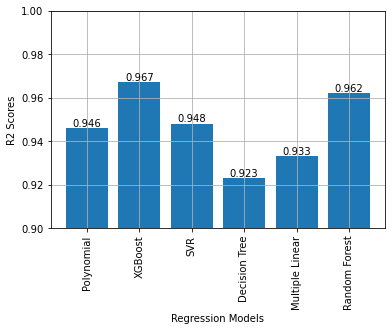

In [21]:
fig, ax = plt.subplots()
bars = ax.bar(r2_scores_labels, r2_scores)
plt.xticks(rotation = 'vertical')
plt.xlabel('Regression Models')
plt.ylabel('R2 Scores')
plt.ylim(0.9,1)
plt.grid()
ax.bar_label(bars);


### It clearly shows that the XGBoost model has the highest r2_score (0.967) among other models